# Tutorial 2: Two componant system

In tutorial 1 we became acquainted with how to build a database and start analysing the properties of these systems. In tutorial 2 will look at a more complex system and check some of the conductivity calulcations possible currently for two component materials.

In [1]:
import mdsuite as mds
import os

Specifically, we will be looking at molten NaCl at 1400K. We start, as always, with the construction of the database under a new name, NaCl_1400K

In [2]:
NaCl_1400K = mds.Trajectory(analysis_name="NaCl_1400K", 
                           new_project=True,
                          storage_path=".",
                          temperature=1400.0,
                          time_step=0.002,
                          time_unit=1e-12,
                          filename="trajectory_files/NaCl_1400K.dump",
                          length_unit=1e-10)

First, let's unwrap the coordinates in order to plot some msd characteristics

In [3]:
NaCl_1400K.Unwrap_Coordinates()


 --- Beginning to unwrap coordinates --- 

[[  2.8511      4.1542997   5.4330997 ...  20.054031   19.472403
   19.9102   ]
 [ -4.74416    -5.30094    -6.3340473 ... -36.62982   -36.853333
  -37.88983  ]
 [ -6.4794016  -7.1703005  -7.0532007 ...  -3.6319294  -4.3444614
   -3.6056004]
 ...
 [ -2.9270601  -4.2155905  -5.11834   ...  10.17759    11.44875
   12.4164505]
 [  0.72506     2.4988594   3.7544994 ...  -7.1794004  -6.6966896
   -6.9814005]
 [ -6.167537   -7.8690004  -7.8091    ...  -1.1702309  -2.4225597
   -2.72676  ]]


ValueError: Unable to create group (name already exists)

The first point of dynamics analysis is usually the self diffusion, now of course, we have two componants, so let's see how the program will handle this.

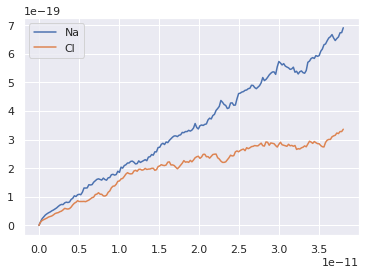

Einstein Self-Diffusion Coefficients:

Na: 1.6928102758794975e-08

Cl: 7.393065005039924e-09



In [4]:
NaCl_1400K.Einstein_Diffusion_Coefficients(plot=True)

If you only want to look at a single componant, one simply needs to include the keyword argument as follows

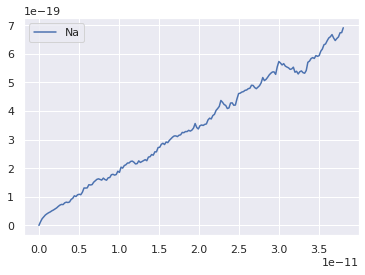

Einstein Self-Diffusion Coefficients:

Na: 1.6928102758794975e-08



In [5]:
NaCl_1400K.Einstein_Diffusion_Coefficients(plot=True, species=["Na"])

So you can see that we will get only a single analysis performed.

We can also calculate the same property using the GK approach discussed in tutorial 1. Keep in mind that this simulation data is highly innapropriate for such a calculation.

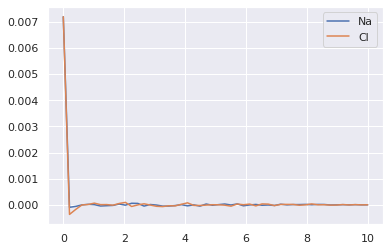

Self-Diffusion Coefficient for Na at 1400.0K: 4.682714042625379e-08 +- 6.015527253255443e-10 m^2/s
Self-Diffusion Coefficient for Cl at 1400.0K: 2.9021916730899767e-08 +- 3.6229453760019406e-10 m^2/s


In [21]:
NaCl_1400K.Green_Kubo_Diffusion_Coefficients(plot=True, data_range=50)

So you can see that this value is much larger than what we would expect based on the Einstein approahc taken above.

The other dynamic property of interest in many investigations it the ionic conductivity. For a fully uncorrelated system, this is trivially possible through the Nernst-Einstein relation, calculated in this code by simply running the adding the Nernst_Einstein keywork argument to either of the diffusion coefficient calculations.

This approach however, neglects all correlation between the ionic species that may be present in the system. To accound for this, we can run either the Einstein-Helfand analysis, or the Green-Kubo correlary analysis to calculate this value. You must note that the simulation being used in this tutorial is very small and very short, therefore, the results that are to be shown will be inconsistant with each other, and with reality.

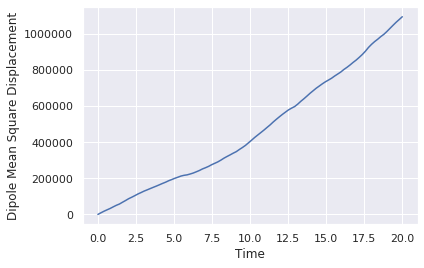

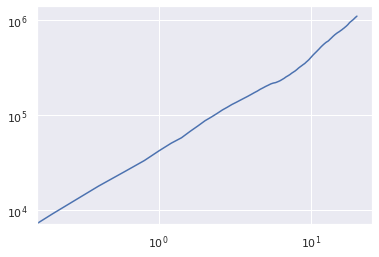

Einstein-Helfand Conductivity at 1400.0K: 4.766294323024477 +- 0.874588171799582 S/cm


In [12]:
NaCl_1400K.Einstein_Helfand_Conductivity(measurement_range=100, plot=True)

The error in this analysis comes by fitting a line over various ranges of the linear region and averaging over the calucated gradients

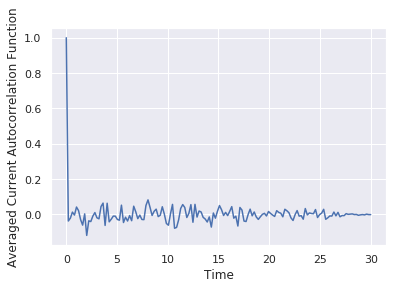

Green-Kubo Ionic Conductivity at 1400.0K: 6.326832373889549 +- 0.3059748266635579 S/cm^2


6.326832373889549

In [18]:
NaCl_1400K.Green_Kubo_Conductivity(plot=True, data_range=150)

You can see in particular for the Green-Kubo that the data is highly innapropriate for this kind of analysis. Nonetheless, it can be performed. The issue with the trajectory is that it was sampled every 100 time steps, therefore, the GK approach will often fail as the resolution is too poor.